# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
from scipy import stats



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
ValueNumeric = [float(element.strip('€MK')) for element in fifa.Value]
fifa['ValueNumeric'] = ValueNumeric


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm


df = fifa[['ValueNumeric', 'Position', 'Preferred Foot']]
df.columns = ['ValueNumeric', 'Position', 'Foot']

model = ols('ValueNumeric ~ Foot + C(Position)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
Foot,7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:

# La diferencia  solo es significativa en position, no en foot.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm


dfNationality = fifa[['ValueNumeric', 'Nationality']]


modelNat = ols('ValueNumeric ~ C(Nationality)', data=dfNationality).fit()
anova_tableNat = sm.stats.anova_lm(modelNat, typ=2)
anova_tableNat


,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [29]:
# Your code here:

StNotnull = fifa[(fifa['Stamina'].isnull()==False)]

fifa_Sta = StNotnull[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']]


SprNotnull = fifa[(fifa['SprintSpeed']).isnull()==False] 
    

fifa_Sta_Spr = SprNotnull[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']]


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [31]:
# Your code here:
import statsmodels.api as sm

X = sm.add_constant(fifa_Sta_Spr['Stamina']) # We must add the intercept using the add_constant function
Y = fifa_Sta_Spr['SprintSpeed']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:            SprintSpeed   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:27:52   Log-Likelihood:                -70109.
No. Observations:               18159   AIC:                         1.402e+05
Df Residuals:                   18157   BIC:                         1.402e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6049      0.350     81.758      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [36]:
# Your conclusions here:



# The r squared is 0.384 es considerable. Significa que nuestro modelo tiene más del 38% de variación.

# Al ser alto el F-test significa que la variación es grande entre los dos grupos.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [34]:
# Your code here:

potNotnull = fifa_Sta_Spr[(fifa_Sta_Spr['Potential']).isnull()==False] 
    

fifa_Pot = potNotnull[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']]



X = sm.add_constant(fifa_Pot['Potential']) # We must add the intercept using the add_constant function
Y = potNotnull['SprintSpeed']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:            SprintSpeed   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          8.46e-230
Time:                        21:36:23   Log-Likelihood:                -73989.
No. Observations:               18159   AIC:                         1.480e+05
Df Residuals:                   18157   BIC:                         1.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3998      1.233     19.796      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [37]:
# Your conclusions here:


# The r squared is 0.056 es considerable. Significa que nuestro modelo tiene más del 5% de variación.

# El F-test es alto pero no tanto como el anterior, como demuestra el menor porcentaje de variación.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

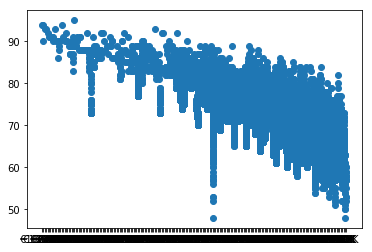

In [38]:
# Your code here:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(fifa_Pot['Value'], fifa_Pot['Potential'])

In [ ]:
# La relación lineal es muy sutil y descendente.